      ACCIDENT_DATE ACCIDENT_TIME ALCOHOLTIME                  ACCIDENT_TYPE  \
3309     15/11/2013      05.35.00         Yes         Collision with vehicle   
3509     11/11/2013      17.45.00          No  Collision with a fixed object   
3562     12/11/2013      08.10.00          No                  Struck animal   
3663     12/11/2013      18.03.00         Yes  Collision with a fixed object   
3839     29/10/2013      14.05.00          No  Collision with a fixed object   
...             ...           ...         ...                            ...   
47993     3/12/2016      07.00.00         Yes  Collision with a fixed object   
48166     9/12/2016      12.15.00          No         Collision with vehicle   
48538     7/11/2016      01.00.00         Yes  Collision with a fixed object   
48847     8/11/2016      16.00.00          No  Collision with a fixed object   
58519      5/8/2016      06.03.00          No                  Struck animal   

      DAY_OF_WEEK        LIGHT_CONDITIO

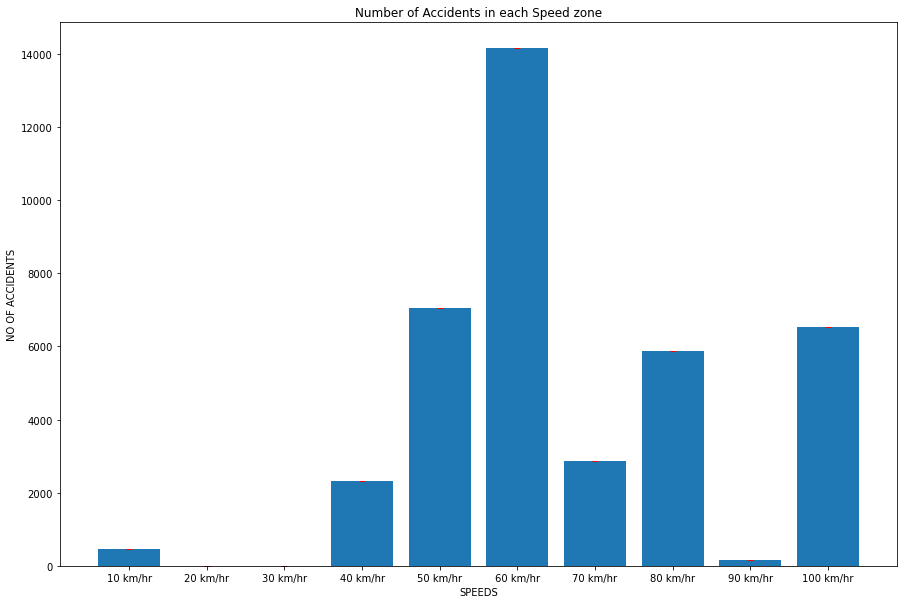

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def data_prepocessing():
    # read the input .csv file for processing purposes..you can choose columns as you wish............................
    df = pd.read_csv("CrashStatisticsVictoria.csv", usecols=[4,5,6,7,8,11,15,26])

    # take the input form user for filterout the given period.....................

    # ask for the date period with asking format..................................
    s_date = input("Enter starting date in format of yyyy-mm-dd : ")
    e_date = input("Enter Ending date in format of yyyy-mm-dd : ")
    # ask for the time period with asking format..................................
    s_time = input("Enter starting time in format hh.mm.ss : ")
    e_time = input("Enter ending time in format hh.mm.ss : ")

    # convert the .csv time to timestamp format for easy access...................
    df['DATE'] = pd.to_datetime(df['ACCIDENT_DATE'])


    # filter out the selected range of dates......................................
    '''
    this takes upto end date. does not take end date.
    If you want to consider end date too.. simply change the '<' symbol with '<="
    '''
    filt = (df['DATE'] >= pd.to_datetime(s_date)) & (df['DATE'] < pd.to_datetime(e_date))
    # update the dataframe according to filtered dates............................
    df = df.loc[filt] 

    # filter out the selected range of time......................................
    filt = (df['ACCIDENT_TIME'] >=s_time) & (df['ACCIDENT_TIME'] < e_time)
    # update the dataframe according to filtered dates............................
    df = df.loc[filt]

    return s_date, e_date, s_time, e_time, df


def plot_speed():
    # assign the variables using previous function................................
    s_date, e_date, s_time, e_time, df = data_prepocessing()

    # defining lists..............................................................
    lst = ['10 km/hr','20 km/hr','30 km/hr','40 km/hr','50 km/hr','60 km/hr','70 km/hr','80 km/hr','90 km/hr','100 km/hr',]
    

    # define a list to store selected average accidents...........................
    accidents = []


    #.............calculate the average accidents for given period................
    for i in lst:
        
        new_df = df[df['SPEED_ZONE'].str.contains(i)]
        print(new_df)
        
        accidents.append(new_df.shape[0])

    #plot the bar chart..........................................................
    fig, axes = plt.subplots(1,1, figsize = (15,10))
    plt.bar(lst,accidents)
    plt.plot(lst, accidents, "r_")
    plt.xlabel("SPEEDS")
    plt.ylabel("NO OF ACCIDENTS")
    plt.title("Number of Accidents in each Speed zone")
    plt.show()


'''

you have to call this function and give the inputs in correct(asked) order


'''

plot_speed()

In [ ]:
   # plot the bar chart..........................................................
    fig, axes = plt.subplots(1,1, figsize = (15,10))
    plt.bar(lst,accidents)
    plt.plot(lst, accidents, "r_")
    plt.xlabel("HOURS")
    plt.ylabel("AVERAGE ACCIDENTS")
    plt.title("Number of Accidents in each hour of the day (on average)")
    plt.show()

In [187]:
index_lst = df.index
print(index_lst)

for i in index_lst:
    string = str(df.at[int(i), 'ACCIDENT_DATE'])

    element = datetime.datetime.strptime(string,"%m/%d/%Y")
  
    tuple = element.timetuple()
    timestamp = time.mktime(tuple)

    df.at[int(i), 'ts'] = timestamp



#df.sort_values(by=['ts'])
df

Int64Index([24854, 24856, 24860, 24862, 24902, 24903, 24905, 24906, 24907,
            24908, 24913, 24954, 24959, 24960, 24961, 24962, 24963, 24965,
            25006, 25007, 25008, 25011, 25112, 25171, 26163, 26164, 26165,
            26168, 26169, 26171, 26172, 26173, 26174, 26175, 26215, 26216,
            26217, 26218, 26220, 26221, 26224, 26256, 26279, 26315, 26342,
            26426, 26486, 26538, 26585, 26797, 26801, 26833, 26837, 26846,
            26882, 26884, 26885, 26886, 26887, 27199, 27443, 27500, 27569,
            27600, 28607, 28868, 28897, 29024, 29421, 29884, 31006],
           dtype='int64')


,ts,ACCIDENT_DATE,ACCIDENT_TIME,DATE,ALCOHOLTIME,ACCIDENT_TYPE,LIGHT_CONDITION,SPEED_ZONE,INJ_OR_FATAL
24854,1.430764e+09,5/5/2015,01.56.00,2015-05-05,Yes,Struck animal,Dark No street lights,100 km/hr,1
24856,1.430764e+09,5/5/2015,06.35.00,2015-05-05,No,Collision with vehicle,Dark Street lights on,60 km/hr,1
24860,1.430764e+09,5/5/2015,06.35.00,2015-05-05,No,Struck Pedestrian,Dark Street lights on,60 km/hr,1
24862,1.430764e+09,5/5/2015,08.28.00,2015-05-05,No,Collision with vehicle,Day,60 km/hr,3
24902,1.430764e+09,5/5/2015,08.55.00,2015-05-05,No,Collision with a fixed object,Day,60 km/hr,1
...,...,...,...,...,...,...,...,...,...
28897,1.430851e+09,5/6/2015,08.00.00,2015-05-06,No,Collision with vehicle,Dusk/Dawn,60 km/hr,1
29024,1.430851e+09,5/6/2015,23.55.00,2015-05-06,Yes,Collision with a fixed object,Dark Street lights on,Not known,1
29421,1.430851e+09,5/6/2015,14.30.00,2015-05-06,No,Vehicle overturned (no collision),Day,50 km/hr,1
29884,1.430764e+09,5/5/2015,18.15.00,2015-05-05,Yes,Struck Pedestrian,Dark Street lights unknown,Not known,2


In [188]:
df.sort_values(by='ts')

,ts,ACCIDENT_DATE,ACCIDENT_TIME,DATE,ALCOHOLTIME,ACCIDENT_TYPE,LIGHT_CONDITION,SPEED_ZONE,INJ_OR_FATAL
24854,1.430764e+09,5/5/2015,01.56.00,2015-05-05,Yes,Struck animal,Dark No street lights,100 km/hr,1
27600,1.430764e+09,5/5/2015,08.32.00,2015-05-05,No,Collision with vehicle,Day,60 km/hr,1
27569,1.430764e+09,5/5/2015,10.30.00,2015-05-05,No,Struck Pedestrian,Day,Camping grounds or off road,1
27500,1.430764e+09,5/5/2015,17.30.00,2015-05-05,No,Collision with vehicle,Dusk/Dawn,100 km/hr,1
27443,1.430764e+09,5/5/2015,17.30.00,2015-05-05,No,Collision with vehicle,Dusk/Dawn,50 km/hr,1
...,...,...,...,...,...,...,...,...,...
26256,1.430851e+09,5/6/2015,08.50.00,2015-05-06,No,Collision with vehicle,Dusk/Dawn,50 km/hr,1
26279,1.430851e+09,5/6/2015,16.00.00,2015-05-06,No,Collision with vehicle,Dusk/Dawn,70 km/hr,1
26426,1.430851e+09,5/6/2015,13.50.00,2015-05-06,No,Collision with vehicle,Day,60 km/hr,1
26538,1.430851e+09,5/6/2015,19.20.00,2015-05-06,Yes,Collision with vehicle,Dark Street lights on,60 km/hr,1


In [77]:
import time
import datetime
  
  
string = "01/20/2015"
  
element = datetime.datetime.strptime(string,"%m/%d/%Y")
  
tuple = element.timetuple()
timestamp = time.mktime(tuple)
  
print(timestamp)

1421692200.0


In [78]:
import time
import datetime
  
  
string = "01/21/2015"
  
element = datetime.datetime.strptime(string,"%m/%d/%Y")
  
tuple = element.timetuple()
timestamp = time.mktime(tuple)
  
print(timestamp)

1421778600.0


In [79]:
import time
import datetime
  
  
string = "01/22/2015"
  
element = datetime.datetime.strptime(string,"%m/%d/%Y")
  
tuple = element.timetuple()
timestamp = time.mktime(tuple)
  
print(timestamp)

1421865000.0


In [90]:
print(1430851000.0-1430764000.0)

87000.0
